In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.7.0


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import os
import numpy as np
import pandas as pd
import re
from re import search
import csv
import fasttext
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Flatten, GRU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 1.1 Data Loading for Reddit Dataset

In [7]:
#Read filtered review for chosen app
df = pd.read_csv("reddit_filtered.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFjtBvreXWVPzDBNkhrq-Buxd2EwEcCW6ECJQN...,Trever Bennnett,https://play-lh.googleusercontent.com/a/AATXAJ...,Its okay for technical stuff or like memes The...,1,0,2022.1.0,2022-01-21 20:42:19,NaN,NaN
1,gp:AOqpTOHHyIsrsOBynJkIJkrdqP7CzQIfHGr5ayvnfh3...,mike riley,https://play-lh.googleusercontent.com/a/AATXAJ...,I love this app its got such cute animal pics ...,5,0,2022.1.0,2022-01-21 20:39:49,NaN,NaN
2,gp:AOqpTOFeecu6P8dtLXU15VNSgqQBIIzFgjMqi7mKnWd...,don charlie,https://play-lh.googleusercontent.com/a-/AOh14...,Good info,5,0,2022.1.0,2022-01-21 20:29:41,NaN,NaN
3,gp:AOqpTOEaigI9oUXfnMkuTT4JDISI_Ki5JfwwJ7Nyq0f...,Olivvia Mialik,https://play-lh.googleusercontent.com/a-/AOh14...,Cannot increase text size,2,0,2022.1.0,2022-01-21 20:23:44,NaN,NaN
4,gp:AOqpTOEJ6wjFCeFwQEw6iHzkiz9V32PilAeRacoOLWT...,Roshan Singh,https://play-lh.googleusercontent.com/a-/AOh14...,Great app I have been using it for years And ...,5,0,2022.2.0,2022-01-21 20:22:47,NaN,NaN


### 1.3 Standard Data Processing


In [9]:
# Convert the content and scores into numeric tensors
maxlen = 40  # Cut review after 40
training_samples = 90000  # set to have 90000 samples
max_words = 10000  # We will only consider the top 10000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words) # num_words: the maximum number of words to keep, based on word frequency.
tokenizer.fit_on_texts(content_list)
sequences = tokenizer.texts_to_sequences(content_list)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = score_list
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

X = data[:training_samples]
y = labels[:training_samples]

print(X)
print(y)

Found 29531 unique tokens.
Shape of data tensor: (101316, 40)
Shape of label tensor: (101316, 5)
[[ 169   34   29 ...  485   77  212]
 [   0    0    0 ...   27   83   67]
 [   0    0    0 ...    0   18  287]
 ...
 [   0    0    0 ...    0    0 3454]
 [   0    0    0 ...    0    0   16]
 [   0    0    0 ...   54    1  563]]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


### 1.4 Data Sampling

In [8]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 1.5 Data Processing for FastText Model (Unused)
Only run this after running Standard Data Processing when attempting to use the FastText Model. The data preprocessing for FastText is a different procedure from  Word2Vec/gloVe.

In [64]:
#Read filtered review for chosen app
df = pd.read_csv("<insert csv here>.csv")
df.head()

In [58]:
# Altering content and score column to suit FastText input
df.iloc[:, 3] = df.iloc[:, 3].apply(lambda x: ' ' + str(x))
df.iloc[:, 4] = df.iloc[:, 4].apply(lambda x: '__label__' + str(x))

In [57]:
# Convert dataframe columns to numpy array
X = df['content'].to_numpy()
y = df['score'].to_numpy()

In [58]:
# Split X and Y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# Combine X and Y data into one string
train_data = []
test_data = []
xRowCount = 0
for row in X_train:
    label = y_train[xRowCount]
    train_data.append(label + row)
    xRowCount += 1
    
xRowCount = 0
for row in X_test:
    label = y_test[xRowCount]
    test_data.append(label + row)
    xRowCount += 1

In [60]:
# Convert to numpy arrays and load as text files for input
train_file = open("train_data.txt", "w")
for row in train_data:
    train_file.write(row + '\n')
train_file.close()

test_file = open("test_data.txt", "w")
for row in test_data:
    test_file.write(row + '\n')
test_file.close()

### 1.6 GloVe Word Embedding Preparation
Only run this after running Standard Data Processing when attempting to use the gloVe Model.

In [ ]:
# Load glove embedding word vectors
glove_dir = 'C:\\Users\\Glenn\\Desktop\\Year 3\\DL\\Assignment 2\\glove.6B'
#glove_dir = 'C:\\DL\\Week_7\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
# Prepare embedding matrix to be loaded into embedding layer
embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

## Step 2 – Develop a Sentiment Analysis Model

### Model #1 - GRU Model on Reddit Dataset

In [45]:
# Build the Model
model = Sequential()
model.add(Embedding(max_words, 16, input_length=maxlen))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 40, 32)            1568      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 163,813
Trainable params: 163,813
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Train the Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=30,
                    validation_split=0.2)

Train on 57600 samples, validate on 14400 samples
Epoch 1/10
57600/57600 [==============================] - 81s 1ms/sample - loss: 0.9168 - acc: 0.6897 - val_loss: 0.8199 - val_acc: 0.7260
Epoch 2/10
57600/57600 [==============================] - 74s 1ms/sample - loss: 0.8134 - acc: 0.7241 - val_loss: 0.8217 - val_acc: 0.7292
Epoch 3/10
57600/57600 [==============================] - 83s 1ms/sample - loss: 0.7802 - acc: 0.7350 - val_loss: 0.8133 - val_acc: 0.7263
Epoch 4/10
57600/57600 [==============================] - 65s 1ms/sample - loss: 0.7563 - acc: 0.7411 - val_loss: 0.8214 - val_acc: 0.7253
Epoch 5/10
57600/57600 [==============================] - 71s 1ms/sample - loss: 0.7327 - acc: 0.7494 - val_loss: 0.8189 - val_acc: 0.7292
Epoch 6/10
57600/57600 [==============================] - 86s 1ms/sample - loss: 0.7127 - acc: 0.7573 - val_loss: 0.8453 - val_acc: 0.7123
Epoch 7/10
57600/57600 [==============================] - 80s 1ms/sample - loss: 0.7003 - acc: 0.7610 - val_loss: 0.

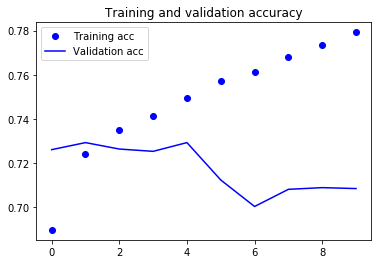

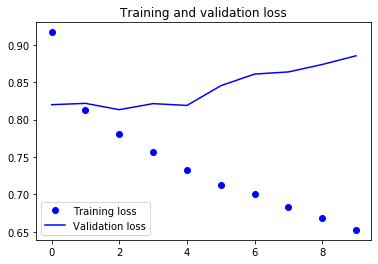

In [47]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
# Improve the model
# There are many options for improvements to the RNN model.
# The current idea is to convert to an LSTM Model
# Apply dropout, recurrent dropout and L2 regularization to LSTM layers
# After researching, it was found that dropout and recurrent dropout values of 40% produce better results.
# L2 Regularization was also commonly applied to most LTSM models with its small weight decay of 1e-4
# 2 LSTM layers will be used in place of the 2 SimpleRNN layers in the initial model

In [49]:
# Build Improved Model
model = Sequential()
model.add(Embedding(max_words, 16, input_length=maxlen))
model.add(GRU(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),
              dropout=0.4, recurrent_dropout=0.4, return_sequences=True))
model.add(GRU(32, recurrent_dropout=0.4, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
gru (GRU)                    (None, 40, 32)            4800      
_________________________________________________________________
gru_1 (GRU)                  (None, 40, 32)            6336      
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 177,637
Trainable params: 177,637
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Fit & Train Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=30,
                    validation_split=0.2)

Train on 57600 samples, validate on 14400 samples
Epoch 1/10
57600/57600 [==============================] - 597s 10ms/sample - loss: 0.9891 - acc: 0.6758 - val_loss: 0.8806 - val_acc: 0.7125
Epoch 2/10
57600/57600 [==============================] - 604s 10ms/sample - loss: 0.8727 - acc: 0.7119 - val_loss: 0.8478 - val_acc: 0.7190
Epoch 3/10
57600/57600 [==============================] - 556s 10ms/sample - loss: 0.8459 - acc: 0.7184 - val_loss: 0.8269 - val_acc: 0.7233
Epoch 4/10
57600/57600 [==============================] - 562s 10ms/sample - loss: 0.8327 - acc: 0.7205 - val_loss: 0.8220 - val_acc: 0.7233
Epoch 5/10
57600/57600 [==============================] - 558s 10ms/sample - loss: 0.8239 - acc: 0.7227 - val_loss: 0.8255 - val_acc: 0.7243
Epoch 6/10
57600/57600 [==============================] - 499s 9ms/sample - loss: 0.8175 - acc: 0.7253 - val_loss: 0.8215 - val_acc: 0.7254
Epoch 7/10
57600/57600 [==============================] - 519s 9ms/sample - loss: 0.8120 - acc: 0.7259 - 

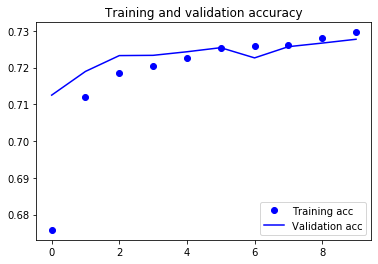

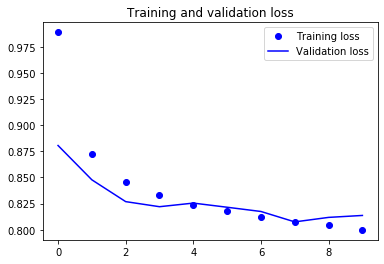

In [51]:
# Plot the Improved Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
# Save the Model
model.save('text_model_1.h5')

### Model #2 GloVe Model on Reddit Dataset

In [56]:
# Build the Model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 50)            500000    
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 564,197
Trainable params: 64,197
Non-trainable params: 500,000
_________________________________________________________________


In [57]:
# Train and fit the Model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 57600 samples, validate on 14400 samples
Epoch 1/10
57600/57600 [==============================] - 9s 160us/sample - loss: 0.9858 - acc: 0.6657 - val_loss: 0.9351 - val_acc: 0.6821
Epoch 2/10
57600/57600 [==============================] - 9s 163us/sample - loss: 0.9027 - acc: 0.6889 - val_loss: 0.9292 - val_acc: 0.6867
Epoch 3/10
57600/57600 [==============================] - 8s 143us/sample - loss: 0.8627 - acc: 0.7007 - val_loss: 0.9426 - val_acc: 0.6809
Epoch 4/10
57600/57600 [==============================] - 9s 155us/sample - loss: 0.8253 - acc: 0.7126 - val_loss: 0.9629 - val_acc: 0.6849
Epoch 5/10
57600/57600 [==============================] - 8s 138us/sample - loss: 0.7921 - acc: 0.7244 - val_loss: 0.9919 - val_acc: 0.6782
Epoch 6/10
57600/57600 [==============================] - 9s 158us/sample - loss: 0.7629 - acc: 0.7353 - val_loss: 1.0338 - val_acc: 0.6719
Epoch 7/10
57600/57600 [==============================] - 8s 140us/sample - loss: 0.7358 - acc: 0.7438 - val_l

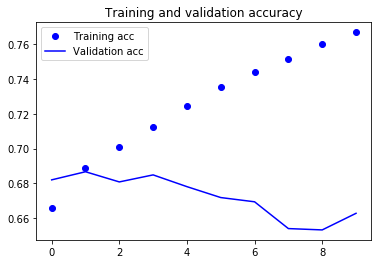

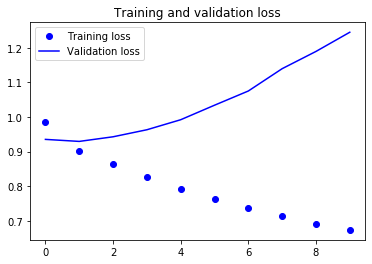

In [58]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
# Improve the model by adding regularization and dropout layers, Unfreeze Layers
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 40, 50)            500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                128064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)               

In [60]:
# Compile and fit model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Train on 57600 samples, validate on 14400 samples
Epoch 1/30
57600/57600 [==============================] - 13s 232us/sample - loss: 1.0776 - acc: 0.6670 - val_loss: 0.9336 - val_acc: 0.7081
Epoch 2/30
57600/57600 [==============================] - 17s 300us/sample - loss: 0.9428 - acc: 0.7055 - val_loss: 0.8919 - val_acc: 0.7156
Epoch 3/30
57600/57600 [==============================] - 16s 283us/sample - loss: 0.9081 - acc: 0.7121 - val_loss: 0.8920 - val_acc: 0.7149
Epoch 4/30
57600/57600 [==============================] - 16s 282us/sample - loss: 0.8898 - acc: 0.7161 - val_loss: 0.8680 - val_acc: 0.7228
Epoch 5/30
57600/57600 [==============================] - 16s 274us/sample - loss: 0.8748 - acc: 0.7219 - val_loss: 0.8596 - val_acc: 0.7283
Epoch 6/30
57600/57600 [==============================] - 17s 293us/sample - loss: 0.8658 - acc: 0.7251 - val_loss: 0.8571 - val_acc: 0.7285
Epoch 7/30
57600/57600 [==============================] - 17s 299us/sample - loss: 0.8574 - acc: 0.7279 

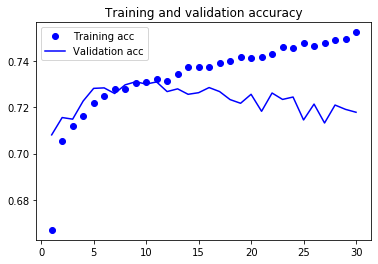

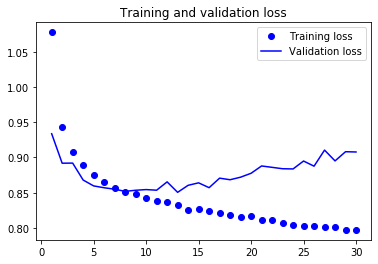

In [61]:
# Plot the model
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
# Save the Model
model.save('text_model_2.h5')

## Step 3 – Evaluate the Model using Testing Data

In [86]:
# Model #1 GRU Model
model = Sequential()
model.add(Embedding(max_words, 16, input_length=maxlen))
model.add(GRU(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), 
              dropout=0.4, recurrent_dropout=0.4, return_sequences=True))
model.add(GRU(32, recurrent_dropout=0.4, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()
model.load_weights('text_model_1.h5')

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 40, 16)            160000    
_________________________________________________________________
gru_3 (GRU)                  (None, 40, 32)            4800      
_________________________________________________________________
gru_4 (GRU)                  (None, 40, 32)            6336      
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 177,637
Trainable params: 177,637
Non-trainable params: 0
_________________________________________________________________


In [87]:
#Compile Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [88]:
#Evaluation on Reddit Dataset
model.evaluate(X_test, y_test, verbose=2)

18000/18000 - 31s - loss: 0.8118 - acc: 0.7252


[0.8118233558601803, 0.72522223]

In [107]:
# Model #2 GloVe Word Embedding Model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()
model.load_weights('text_model_2.h5')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 40, 50)            500000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                128064    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)              

In [108]:
#Compile Model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [109]:
#Evaluation on Reddit Dataset
model.evaluate(X_test, y_test, verbose=2)

18000/18000 - 1s - loss: 0.8014 - acc: 0.7529


[0.8014465415212844, 0.75294447]

## Step 4 – Use the Best Model to make prediction

In [ ]:
model = Sequential()
model.add(Embedding(10000, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.load_weights('text_model_best.h5')
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [12]:
# test user input Rating 5
text_input = np.array([input()])

I really like this app! It is very nice to use!


In [19]:
# test user input Rating 4
text_input = np.array([input()])

Its not too bad. I enjoy discussing reddit threads with other people. Still better than twitter though...


In [22]:
# test user input Rating 3
text_input = np.array([input()])

Its not as smooth as i thought it would be. I give it perks that it provides good quality content and the community is nice but the UI and its design is not that great. Could work on better improvements


In [25]:
# test user input Rating 2
text_input = np.array([input()])

The loading is quite slow and most of the content i have saved in my bookmarks end up disappearing. It is not the best experience. I am hoping the next update would add better improvements


In [28]:
# test user input Rating 1
text_input = np.array([input()])

man i havent exprienced an app this bad in quite awhile. The processing takes too long, my favourites are always gone and the community is horrible. wont experience ever again


In [29]:
# convert the user input into numeric tensor
maxlen = 40  # Cut review after 40 words

tokenizer.fit_on_texts(text_input)
sequences = tokenizer.texts_to_sequences(text_input)

word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=maxlen)

In [18]:
# Prediction for rating 5 (Success)
model.predict(data)

array([[0.04411256, 0.01535538, 0.06514562, 0.19653971, 0.6788467 ]],
      dtype=float32)

In [21]:
# prediction for rating 4 (Success)
model.predict(data)

array([[0.04196046, 0.06933104, 0.27400002, 0.41528878, 0.19941969]],
      dtype=float32)

In [24]:
# Prediction for rating 3 (Failure)
model.predict(data)

array([[0.00093735, 0.0053682 , 0.12234452, 0.7387345 , 0.13261539]],
      dtype=float32)

In [27]:
# Prediction for rating 2 (Failure)
model.predict(data)

array([[0.19198836, 0.26071376, 0.32254484, 0.17094749, 0.05380553]],
      dtype=float32)

In [30]:
# Prediction for rating 1 (Success)
model.predict(data)

array([[0.61508906, 0.21565367, 0.10343461, 0.03546254, 0.0303601 ]],
      dtype=float32)